# Inversion

We are going to utilize the processed resistivity data measured by GEOPHILUS for conducting 1D inversions. As usual, we need to import the necessary libraries.

In [4]:
import utm
import fiona
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from utm import to_latlon
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from pygimli.frameworks import harmfit
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from inversion import VESRhoModelling, VES2dModelling
from inversion import InversionClass

Then, we are ready to conduct the inversion for all profiles in the field and save the results.

In [11]:
#%%  Create an instance of the inversion class
inversion_obj = InversionClass()
farmName_Original = 'Trebbin Wertheim_Processed'
data_lineIndexed_file = f"data_lineIndexed_{farmName_Original}.txt"

Inv_File_name = 'TRB_Wertheim_geophilus_eri_epsg4236'
filepath_Original = 'TRB_Wertheim_Geophilus_roh_221125.csv'
kmlFile = 'TRB_Wertheim_Referenzpunkte_gemessen_2022-12-01.kml'
refPoints = inversion_obj.import_reference_points_from_kml(kmlFile, filepath_Original)

#  inv for processed (HLOF)
amVec = np.arange(1, 6) * 0.6  # Geophilius 3.0 (2020)
farmName_Processed = 'Trebbin Wertheim_HLOF'
data_type_HLOF = 'LOF'
filepath_Processed = f"harmfitted_{data_type_HLOF}_{farmName_Original}.txt"
Stmodels, chi2 = inversion_obj.inversion_1D_all_lines(filepath_Processed, amVec, farmName_Processed, Inv_File_name)


Right after completing the inversion, we can proceed to generate the necessary plots.

C:\Users\Roudsari.S\AppData\Local\Temp\ipykernel_9828\545389414.py:409: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.03, 0.93, 0.95])  # Adjust the layout to make room for the suptitle


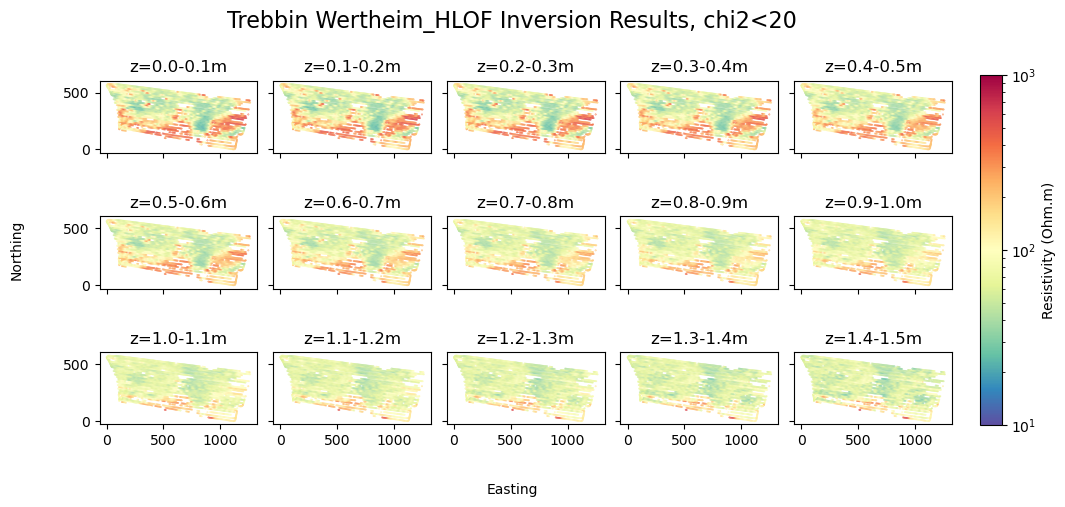

In [8]:
farmName_Processed = 'Trebbin Wertheim_HLOF'
inv_res_filepath = f'1Dinv_response_all_lines_{farmName_Processed}.csv'
Inv_File_name = 'TRB_Wertheim_geophilus_eri_epsg4236'
inversion_obj.subplot_inversion_limit_chi2(inv_res_filepath, farmName_Processed, Inv_File_name, chi2_limit=20)